Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [72]:
import matplotlib.pyplot as plt
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.shape

(506, 14)

In [73]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


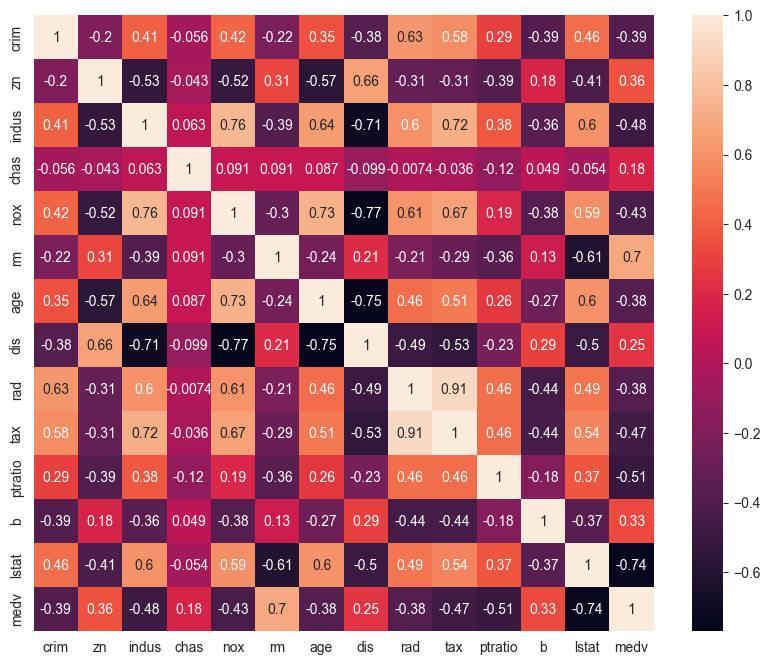

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [77]:
df.corr()[(df.corr() > 0.8) & (df.corr() != 1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN,NaN


In [78]:
## We can notice here that rad and tax column have corr over 0.8 or 0.9, hence there is multi-collinearity in this data.

## VIF

In [79]:
len(df.columns) - 1

13

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(len(df.columns) - 1):
    vif.append(variance_inflation_factor(df.iloc[:, 0:13], i))

vif_values = pd.DataFrame({'vif': vif}, index=df.columns[0:13]).T
vif_values.T

,vif
crim,2.100373
zn,2.844013
indus,14.485758
chas,1.152952
nox,73.894947
rm,77.948283
age,21.386850
dis,14.699652
rad,15.167725
tax,61.227274


In [152]:
# The cols that contain high variance
col_to_drop = vif_values[vif_values > 5].dropna(axis=1).columns
col_to_drop

Index(['indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [153]:
df_filtered_vif = df.drop(columns=col_to_drop)
df_filtered_vif

,crim,zn,chas,medv
0,0.00632,18.0,0,24.0
1,0.02731,0.0,0,21.6
2,0.02729,0.0,0,34.7
3,0.03237,0.0,0,33.4
4,0.06905,0.0,0,36.2
...,...,...,...,...
501,0.06263,0.0,0,22.4
502,0.04527,0.0,0,20.6
503,0.06076,0.0,0,23.9
504,0.10959,0.0,0,22.0


### Condition Number

In [139]:
np.linalg.cond(df.iloc[:, :13])

8497.936303845738

In [83]:
df_dot_product = np.dot(df.iloc[:, :13].T, df.iloc[:, :13])
np.linalg.inv(df_dot_product)

array([[ 4.77679420e-05, -1.77639818e-06,  3.65436158e-06,
         6.07165346e-05,  1.36416009e-04, -1.18002436e-05,
         4.02982362e-08,  2.73366113e-05, -2.40759033e-05,
         2.63959004e-08, -3.37270898e-06,  3.86699871e-07,
        -1.27292879e-05],
       [-1.77639818e-06,  8.36403150e-06,  4.03591354e-06,
        -8.08848326e-06,  5.35927145e-05, -4.39231257e-05,
         9.87579867e-07, -4.99747370e-05,  4.54926112e-06,
        -5.17551938e-07,  2.36985506e-05, -2.98513682e-08,
        -1.85921319e-06],
       [ 3.65436158e-06,  4.03591354e-06,  1.67415802e-04,
        -2.38781239e-04, -2.43450294e-03,  1.50301397e-04,
        -2.10299192e-07,  1.25848769e-04,  4.75502048e-05,
        -4.43474917e-06, -3.44071168e-05,  3.63805766e-07,
        -8.22935145e-06],
       [ 6.07165346e-05, -8.08848326e-06, -2.38781239e-04,
         3.29414817e-02, -7.07147720e-03, -8.06778484e-04,
        -2.45040505e-05,  4.65339910e-05, -2.53512425e-04,
         1.70106865e-05,  3.87256771e

In [89]:
new_df = df.iloc[:, :13].copy()
new_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [94]:
new_df.loc[0, 'nox'] = new_df.loc[0, 'nox'] + 0.1
new_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.738,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [95]:
# As you can notice the condition value has drastically changed when compared to df
# 72214921.42407367
new_df_dot_product = np.dot(new_df.iloc[:, :13].T, new_df.iloc[:, :13])
np.linalg.cond(new_df_dot_product)

70019936.270966

In [96]:
np.linalg.inv(new_df_dot_product)

array([[ 4.77616244e-05, -1.77665221e-06,  3.74486901e-06,
         6.09640893e-05,  1.23522014e-04, -1.12258369e-05,
         5.19238488e-08,  2.72626725e-05, -2.40589604e-05,
         2.74743143e-08, -3.36011775e-06,  3.87635225e-07,
        -1.26669130e-05],
       [-1.77665221e-06,  8.36495042e-06,  4.03027924e-06,
        -8.11186407e-06,  5.64811537e-05, -4.40628527e-05,
         9.83414308e-07, -4.99512645e-05,  4.55988273e-06,
        -5.18713559e-07,  2.37052389e-05, -3.01653994e-08,
        -1.86927150e-06],
       [ 3.74486901e-06,  4.03027924e-06,  1.66211716e-04,
        -2.41995091e-04, -2.28378253e-03,  1.43697352e-04,
        -3.30610515e-07,  1.26644095e-04,  4.72082612e-05,
        -4.43817214e-06, -3.46492059e-05,  3.53915210e-07,
        -8.99753469e-06],
       [ 6.09640893e-05, -8.11186407e-06, -2.41995091e-04,
         3.29329771e-02, -6.68845258e-03, -8.23445109e-04,
        -2.47933832e-05,  4.84825099e-05, -2.54532972e-04,
         1.70116602e-05,  3.86541583e

# Ways to remove multi-collinearity

### 2. Removing one of the highly correlated var

In [140]:
import statsmodels.api as sm

data_with_constant_all = sm.add_constant(df.drop('medv', axis=1))

model_df = sm.OLS(df['medv'], data_with_constant_all).fit()
print('Regression summary for the model df with all predictors:')
print(model_df.summary())

Regression summary for the model df with all predictors:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          6.72e-135
Time:                        12:21:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [146]:
# Removing only tax
new_df = df.copy().drop(columns=['tax'])
data_with_constant_reduced_1 = sm.add_constant(new_df.drop('medv', axis=1))
new_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48,22.0


In [147]:
model_reduced_1 = sm.OLS(new_df['medv'], data_with_constant_reduced_1).fit()

print('Regression summary for the model with one predictor removed:')
print(model_reduced_1.summary())

Regression summary for the model with one predictor removed:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.21e-133
Time:                        12:26:29   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [148]:
# Removing all the high corr. ones
new_df = df.copy().drop(columns=['tax','nox', 'rm', 'ptratio','b'])
data_with_constant_reduced_2 = sm.add_constant(new_df.drop('medv', axis=1))
new_df

,crim,zn,indus,chas,age,dis,rad,lstat,medv
0,0.00632,18.0,2.31,0,65.2,4.0900,1,4.98,24.0
1,0.02731,0.0,7.07,0,78.9,4.9671,2,9.14,21.6
2,0.02729,0.0,7.07,0,61.1,4.9671,2,4.03,34.7
3,0.03237,0.0,2.18,0,45.8,6.0622,3,2.94,33.4
4,0.06905,0.0,2.18,0,54.2,6.0622,3,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,69.1,2.4786,1,9.67,22.4
502,0.04527,0.0,11.93,0,76.7,2.2875,1,9.08,20.6
503,0.06076,0.0,11.93,0,91.0,2.1675,1,5.64,23.9
504,0.10959,0.0,11.93,0,89.3,2.3889,1,6.48,22.0


In [155]:
model_reduced_2 = sm.OLS(new_df['medv'], data_with_constant_reduced_2).fit()

print('Regression summary for the model with predictor removed using high corr:')
print(model_reduced_2.summary())

Regression summary for the model with predictor removed using high corr:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     108.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          9.32e-104
Time:                        12:32:55   Log-Likelihood:                -1585.0
No. Observations:                 506   AIC:                             3188.
Df Residuals:                     497   BIC:                             3226.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [102]:
# We can notice how the value has decreased the condition number from 15,100 to 523

In [154]:
# Using the high VIF df
data_with_constant_reduced_3 = sm.add_constant(df_filtered_vif.drop('medv', axis=1))
data_with_constant_reduced_3

,const,crim,zn,chas
0,1.0,0.00632,18.0,0
1,1.0,0.02731,0.0,0
2,1.0,0.02729,0.0,0
3,1.0,0.03237,0.0,0
4,1.0,0.06905,0.0,0
...,...,...,...,...
501,1.0,0.06263,0.0,0
502,1.0,0.04527,0.0,0
503,1.0,0.06076,0.0,0
504,1.0,0.10959,0.0,0


In [157]:
model_reduced_3 = sm.OLS(df_filtered_vif['medv'], data_with_constant_reduced_3).fit()

print('Regression summary for the model with vif predictor removed:')
print(model_reduced_3.summary())

Regression summary for the model with vif predictor removed:
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.67
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           5.23e-33
Time:                        12:33:43   Log-Likelihood:                -1763.1
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     502   BIC:                             3551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
# We can notice how the value has decreased the condition number from 15,100 to 103

### 4. PLS

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

In [112]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :13], df['medv'], random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [126]:
pls_model = PLSRegression(n_components=13)
pls_model.fit(X_train, y_train)

PLSRegression(n_components=13)

In [127]:
y_pred = pls_model.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

MSE:  24.291119474973534
